In [63]:
# wykres x na y
# regresja liniowa
# ze wzorów teoretycznych i z bilbiotek pythonowych
# porównanie w tabeli teoretycznych vs z pythona

In [64]:
# zad 1
# 
# a i b
# wykres
# estymator intercepta i estymator slope
# tabela
# estymator intercepta - wartość teoretyczna ; wartość z biblioteki
# estymator slope - wartość teoretyczna ; wartość z biblioteki
# dalej w tabeli to samo dla przedziałów ufności dla beta0 i beta1

# c
# dokładnie podane h0 i h1
# wzór na statystykę testową T
# rozkład T przy założeniiu, że h0 jest prawdziwe
# wartość krytyczna dla poziomu istotności alfa = 0.05
# p-wartość
# do łącznej tabeli wartość statystyki testowej T, p-wartość (znowu na dwa sposoby)
# to samo dla beta1 i beta0
# decyzję warto napisać na 2 sposoby: matematycznie (odrzucamy/nie odrzucamy h0 na poziomie istotności alfa = 0.05) + znaczenie związane z kontekstem zadania

# d) i e)
# X_k na wykładzie
# tabela - przedział ufności i przedział predykcyjny (teoretyczny i z biblioteki)

# f)
# powtórzony ten wykres z początku + przedziały ufności i predykcyjne dla poszczególnych obserwacji


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import os

In [66]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

import os
zad1_dir = "zad1"
os.makedirs(zad1_dir, exist_ok=True)
zad2_dir = "zad2"
os.makedirs(zad2_dir, exist_ok=True)
zad3_dir = "zad3"
os.makedirs(zad3_dir, exist_ok=True)
zad4_dir = "zad4"
os.makedirs(zad4_dir, exist_ok=True)

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [67]:
# 1
data = np.loadtxt('CH01PR20.txt')
y = data[:, 0]  # Time (hours)
x = data[:, 1]  # Number of copiers

n = len(x)
alpha = 0.05

Teoretyczne beta_0: -0.5801566579634425
Teoretyczne beta_1: 15.035248041775457
Biblioteczne beta_0: -0.5801566579634496
Biblioteczne beta_1: 15.035248041775457


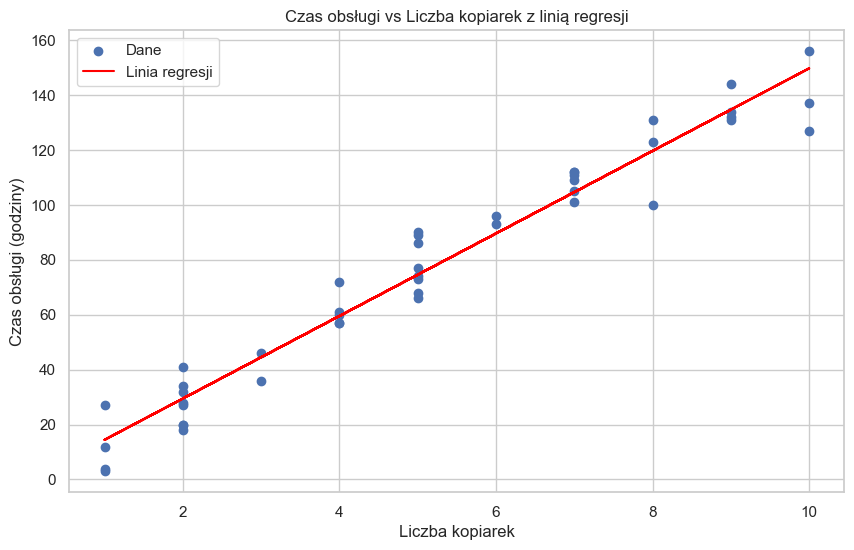

In [68]:
# 1.a

# Theoretical
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
donominator = np.sum((x - x_mean)**2)

beta_1_teor = numerator / donominator
beta_0_teor = y_mean - beta_1_teor * x_mean

print(f"Teoretyczne beta_0: {beta_0_teor}")
print(f"Teoretyczne beta_1: {beta_1_teor}")

# Built-in
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
beta_0_lib, beta_1_lib = model.params

print(f"Biblioteczne beta_0: {beta_0_lib}")
print(f"Biblioteczne beta_1: {beta_1_lib}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dane')
plt.xlabel('Liczba kopiarek')
plt.ylabel('Czas obsługi (godziny)')
plt.title('Czas obsługi vs Liczba kopiarek (Wykres punktowy)')
plt.legend()
plt.savefig(os.path.join(zad1_dir, 'plot_a_scatter.png'))

plt.plot(x, beta_0_teor + beta_1_teor * x, color='red', label='Linia regresji')
plt.title('Czas obsługi vs Liczba kopiarek z linią regresji')
plt.legend()
plt.savefig(os.path.join(zad1_dir, 'plot_a.png'))
plt.show()

Zależność wygląda w przybiliżeniu na liniową.

Równanie regresji liniowej prostej: $y = \beta_0 + \beta_1x$

równanie regresji liniowej:
$y = -0.58 + 15.04*x$

In [69]:
# 1.b
# Theoretical
y_pred = beta_0_teor + beta_1_teor * x
sse = np.sum((y - y_pred)**2)
mse = sse / (n - 2)
se_beta_1 = np.sqrt(mse / np.sum((x - x_mean)**2))
se_beta_0 = np.sqrt(mse * (1/n + x_mean**2 / np.sum((x - x_mean)**2)))

t_crit = stats.t.ppf(1 - alpha/2, n - 2)

ci_beta_1_teor = (beta_1_teor - t_crit * se_beta_1, beta_1_teor + t_crit * se_beta_1)
ci_beta_0_teor = (beta_0_teor - t_crit * se_beta_0, beta_0_teor + t_crit * se_beta_0)

print(f"Teoretyczny przedział ufności beta_0: {ci_beta_0_teor}")
print(f"Teoretyczny przedział ufności beta_1: {ci_beta_1_teor}")

# Built-in
ci_lib = model.conf_int(alpha=alpha)
print(f"Biblioteczny przedział ufności beta_0: {ci_lib[0]}")
print(f"Biblioteczny przedział ufności beta_1: {ci_lib[1]}")


table_a_b_data = [
    ["Intercept (Beta 0)", "Estymator", f"{beta_0_teor:.6f}", f"{beta_0_lib:.6f}"],
    ["Slope (Beta 1)", "Estymator", f"{beta_1_teor:.6f}", f"{beta_1_lib:.6f}"],
    ["Intercept (Beta 0)", "95% CI", f"({ci_beta_0_teor[0]:.6f}, {ci_beta_0_teor[1]:.6f})", f"[{ci_lib[0][0]:.6f}, {ci_lib[0][1]:.6f}]"],
    ["Slope (Beta 1)", "95% CI", f"({ci_beta_1_teor[0]:.6f}, {ci_beta_1_teor[1]:.6f})", f"[{ci_lib[1][0]:.6f}, {ci_lib[1][1]:.6f}]"]
]
df_a_b = pd.DataFrame(table_a_b_data, columns=["Parametr", "Metryka", "Teoretycznie", "Biblioteka"])
with open(os.path.join('zad1', 'table_a_b.md'), 'w') as f:
    f.write(df_a_b.to_markdown(index=False))

Teoretyczny przedział ufności beta_0: (np.float64(-6.234842799781703), np.float64(5.074529483854818))
Teoretyczny przedział ufności beta_1: (np.float64(14.06100982665068), np.float64(16.00948625690023))
Biblioteczny przedział ufności beta_0: [-6.2348428   5.07452948]
Biblioteczny przedział ufności beta_1: [14.06100983 16.00948626]


In [70]:
# 1.c
# H0: beta_i = 0, H1: beta_i != 0
# Theoretical
t_stat_beta_0 = beta_0_teor / se_beta_0
t_stat_beta_1 = beta_1_teor / se_beta_1

p_val_beta_0 = 2 * (1 - stats.t.cdf(np.abs(t_stat_beta_0), n - 2))
p_val_beta_1 = 2 * (1 - stats.t.cdf(np.abs(t_stat_beta_1), n - 2))

print(f"Teoretyczna statystyka t dla beta_0: {t_stat_beta_0}, p-wartość: {p_val_beta_0}")
print(f"Teoretyczna statystyka t dla beta_1: {t_stat_beta_1}, p-wartość: {p_val_beta_1}")

# Built-in
print(f"Biblioteczna statystyka t dla beta_0: {model.tvalues[0]}, p-wartość: {model.pvalues[0]}")
print(f"Biblioteczna statystyka t dla beta_1: {model.tvalues[1]}, p-wartość: {model.pvalues[1]}")

table_c_data = [
    ["Intercept (Beta 0)", "Statystyka T", f"{t_stat_beta_0:.6f}", f"{model.tvalues[0]:.6f}"],
    ["Intercept (Beta 0)", "p-wartość", f"{p_val_beta_0:.6f}", f"{model.pvalues[0]:.6f}"],
    ["Slope (Beta 1)", "Statystyka T", f"{t_stat_beta_1:.6f}", f"{model.tvalues[1]:.6f}"],
    ["Slope (Beta 1)", "p-wartość", f"{p_val_beta_1:.6e}", f"{model.pvalues[1]:.6e}"]
]
df_c = pd.DataFrame(table_c_data, columns=["Parametr", "Metryka", "Teoretycznie", "Biblioteka"])
with open(os.path.join('zad1', 'table_c.md'), 'w') as f:
    f.write(df_c.to_markdown(index=False))

# Decisions
print("\nDecyzje:")
if p_val_beta_1 < alpha:
    print(f"Beta 1: p-wartość ({p_val_beta_1:.4e}) < {alpha}. Odrzucamy H0. Istnieje istotna statystycznie zależność liniowa między liczbą kopiarek a czasem obsługi.")
else:
    print(f"Beta 1: p-wartość ({p_val_beta_1:.4e}) >= {alpha}. Brak podstaw do odrzucenia H0.")

if p_val_beta_0 < alpha:
    print(f"Beta 0: p-wartość ({p_val_beta_0:.4f}) < {alpha}. Odrzucamy H0.")
else:
    print(f"Beta 0: p-wartość ({p_val_beta_0:.4f}) >= {alpha}. Brak podstaw do odrzucenia H0. Wyraz wolny nie jest istotnie różny od 0.")


Teoretyczna statystyka t dla beta_0: -0.2069075766721064, p-wartość: 0.8370587317680616
Teoretyczna statystyka t dla beta_1: 31.123258119597097, p-wartość: 0.0
Biblioteczna statystyka t dla beta_0: -0.20690757667210885, p-wartość: 0.8370587317680596
Biblioteczna statystyka t dla beta_1: 31.123258119597093, p-wartość: 4.009032118604666e-31

Decyzje:
Beta 1: p-wartość (0.0000e+00) < 0.05. Odrzucamy H0. Istnieje istotna statystycznie zależność liniowa między liczbą kopiarek a czasem obsługi.
Beta 0: p-wartość (0.8371) >= 0.05. Brak podstaw do odrzucenia H0. Wyraz wolny nie jest istotnie różny od 0.


In [71]:
# 1.d

k_values = [1, 5, 8, 11, 25, 100]
results_d = []

for k in k_values:
    # Theoretical
    y_hat_k = beta_0_teor + beta_1_teor * k
    se_mean_k = np.sqrt(mse * (1/n + (k - x_mean)**2 / np.sum((x - x_mean)**2)))
    ci_mean_lower = y_hat_k - t_crit * se_mean_k
    ci_mean_upper = y_hat_k + t_crit * se_mean_k
    
    # Built-in
    pred = model.get_prediction([1, k])
    ci_mean_lib = pred.conf_int(obs=False, alpha=alpha) # obs=False for mean response CI
    
    results_d.append({
        'k': k,
        'Oczekiwana (Teor)': y_hat_k,
        'CI Średnia Dolna (Teor)': ci_mean_lower,
        'CI Średnia Górna (Teor)': ci_mean_upper,
        'Długość CI': ci_mean_upper - ci_mean_lower,
        'Oczekiwana (Bibl)': pred.predicted_mean[0],
        'CI Średnia Dolna (Bibl)': ci_mean_lib[0][0],
        'CI Średnia Górna (Bibl)': ci_mean_lib[0][1]
    })

df_d = pd.DataFrame(results_d)
print(df_d)

# Save table to markdown
with open(os.path.join('zad1', 'table_d.md'), 'w') as f:
    f.write(df_d.to_markdown(index=False))

     k  Oczekiwana (Teor)  CI Średnia Dolna (Teor)  CI Średnia Górna (Teor)  \
0    1          14.455091                 9.636140                19.274043   
1    5          74.596084                71.914224                77.277943   
2    8         119.701828               115.815715               123.587941   
3   11         164.807572               158.475440               171.139704   
4   25         375.301044               355.740114               394.861975   
5  100        1502.944648              1410.461436              1595.427859   

   Długość CI  Oczekiwana (Bibl)  CI Średnia Dolna (Bibl)  \
0    9.637903          14.455091                 9.636140   
1    5.363720          74.596084                71.914224   
2    7.772226         119.701828               115.815715   
3   12.664264         164.807572               158.475440   
4   39.121862         375.301044               355.740114   
5  184.966423        1502.944648              1410.461436   

   CI Średnia Górn

In [72]:
# 1.e

results_e = []

for k in k_values:
    # Theoretical
    y_hat_k = beta_0_teor + beta_1_teor * k
    se_pred_k = np.sqrt(mse * (1 + 1/n + (k - x_mean)**2 / np.sum((x - x_mean)**2)))
    pi_lower = y_hat_k - t_crit * se_pred_k
    pi_upper = y_hat_k + t_crit * se_pred_k
    
    # Built-in
    pred = model.get_prediction([1, k])
    pi_lib = pred.conf_int(obs=True, alpha=alpha) # obs=True for prediction interval
    
    results_e.append({
        'k': k,
        'Przewidywana (Teor)': y_hat_k,
        'PI Dolna (Teor)': pi_lower,
        'PI Górna (Teor)': pi_upper,
        'Długość PI': pi_upper - pi_lower,
        'Przewidywana (Bibl)': pred.predicted_mean[0],
        'PI Dolna (Bibl)': pi_lib[0][0],
        'PI Górna (Bibl)': pi_lib[0][1]
    })

df_e = pd.DataFrame(results_e)
print(df_e)

# Save table to markdown
with open(os.path.join('zad1', 'table_e.md'), 'w') as f:
    f.write(df_e.to_markdown(index=False))

     k  Przewidywana (Teor)  PI Dolna (Teor)  PI Górna (Teor)  Długość PI  \
0    1            14.455091        -4.155437        33.065620   37.221057   
1    5            74.596084        56.421325        92.770842   36.349517   
2    8           119.701828       101.310761       138.092895   36.782134   
3   11           164.807572       145.749099       183.866044   38.116945   
4   25           375.301044       348.734910       401.867179   53.132268   
5  100          1502.944648      1408.730668      1597.158627  188.427958   

   Przewidywana (Bibl)  PI Dolna (Bibl)  PI Górna (Bibl)  
0            14.455091        -4.155437        33.065620  
1            74.596084        56.421325        92.770842  
2           119.701828       101.310761       138.092895  
3           164.807572       145.749099       183.866044  
4           375.301044       348.734910       401.867179  
5          1502.944648      1408.730668      1597.158627  


In [73]:
# 1.f

# Sort x for plotting lines
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]

x_grid = np.linspace(min(x), max(x), 100)
X_grid = sm.add_constant(x_grid)
predictions = model.get_prediction(X_grid)
pred_summary = predictions.summary_frame(alpha=alpha)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dane', color='blue')
plt.plot(x_grid, pred_summary['mean'], color='red', label='Linia regresji')

# Mean response CI
plt.plot(x_grid, pred_summary['mean_ci_lower'], color='green', linestyle='--', label='95% CI (Średnia)')
plt.plot(x_grid, pred_summary['mean_ci_upper'], color='green', linestyle='--')

# Prediction Interval
plt.plot(x_grid, pred_summary['obs_ci_lower'], color='orange', linestyle=':', label='95% PI (Obs)')
plt.plot(x_grid, pred_summary['obs_ci_upper'], color='orange', linestyle=':')

plt.xlabel('Liczba kopiarek')
plt.ylabel('Czas obsługi (godziny)')
plt.title('Regresja z 95% przedziałami ufności i predykcji')
plt.legend()
plt.savefig(os.path.join('zad1', 'plot_f.png'))
plt.close()

In [74]:
# zad 2
# teoretycznych wyników tutaj już nie trzeba, wystarczą wyniki z biblioteki
# a) wykres punktów + regresja liniowa
# R^2 - teoretycznie + z biblioteki (jak coś jest po raz pierwszy na tej liście, to trzeba policzyć teoretycznie + z biblioteki)

# b) - nieskorelowane, gdy slope = 0.
# musi być w raporcie (znowu, jak w a)
# - H_0: beta_1 = 0, H_1: beta_1 != 0
# - Statystyka testowa F liczona teoretycznie i z bilbioteki
# - Rozkład F przy założeniiu, że H_0 jest prawdziwe
# - Wartość krytyczna dla poziomu istotności alfa = 0.05
# - p-wartość
# - Decyzja (odrzucamy/nie odrzucamy H_0 na poziomie istotności alfa = 0.05) + znaczenie związane z kontekstem zadania pisane po ludzku a nie matematycznie

# c) predykcje + przedziały predykcyjne dla kilku IQ

# d) wykres punktów + regresja liniowa + przedziały predykcyjne

# e) powtórzenie punktu a dla PH a nie dla IQ

In [75]:
df = pd.read_csv('tabela1_6.txt', sep=r'\s+', header=None, names=['Index', 'GPA', 'IQ', 'Gender', 'PH'])

y = df['GPA'].values
x = df['IQ'].values
n = len(y)
alpha = 0.05
alpha_pred = 0.10

Teoretyczne R^2: 0.401615
Biblioteczne R^2: 0.401615
Równanie regresji: GPA = -3.5571 + 0.1010 * IQ
Model wyjaśnia ok. 40.16% zmienności GPA na podstawie IQ.


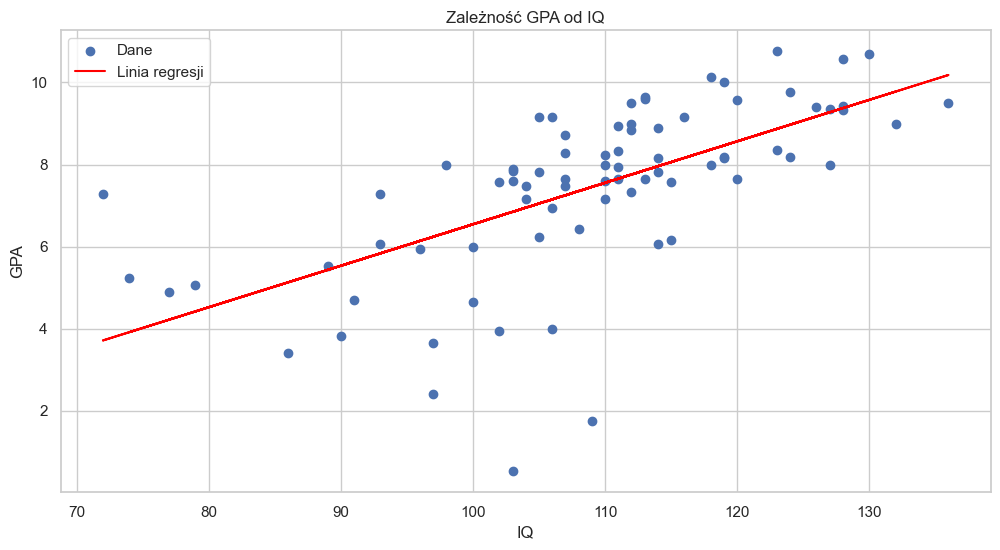

In [76]:
# 2.a
x_mean = np.mean(x) # type: ignore
y_mean = np.mean(y) # type: ignore

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)

beta_1_teor = numerator / denominator
beta_0_teor = y_mean - beta_1_teor * x_mean

y_pred_teor = beta_0_teor + beta_1_teor * x

sst = np.sum((y - y_mean)**2)
sse = np.sum((y - y_pred_teor)**2)
ssr = sst - sse
r2_teor = ssr / sst

print(f"Teoretyczne R^2: {r2_teor:.6f}")

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
beta_0_lib, beta_1_lib = model.params
r2_lib = model.rsquared

print(f"Biblioteczne R^2: {r2_lib:.6f}")
print(f"Równanie regresji: GPA = {beta_0_lib:.4f} + {beta_1_lib:.4f} * IQ")

print(f"Model wyjaśnia ok. {r2_lib*100:.2f}% zmienności GPA na podstawie IQ.")

plt.figure()
plt.scatter(x, y, label='Dane')
plt.plot(x, beta_0_lib + beta_1_lib * x, color='red', label='Linia regresji')
plt.xlabel('IQ')
plt.ylabel('GPA')
plt.title('Zależność GPA od IQ')
plt.legend()
plt.savefig(os.path.join('zad2', 'plot_a_gpa_iq.png'))

table_a_data = [
    ["R^2", "Wartość", f"{r2_teor:.6f}", f"{r2_lib:.6f}"]
]
df_a = pd.DataFrame(table_a_data, columns=["Parametr", "Metryka", "Teoretycznie", "Biblioteka"])
with open(os.path.join('zad2', 'table_a_r2.md'), 'w') as f:
    f.write(df_a.to_markdown(index=False))

In [77]:
# 2.b
# H0: beta1 = 0 (Brak korelacji liniowej)
# H1: beta1 != 0 (Istnieje korelacja liniowa)

# F = MSR / MSE
msr = ssr / 1 # df_r = 1
mse = sse / (n - 2) # df_e = n - 2
f_stat_teor = msr / mse

# sf = survival function = 1 - cdf
p_val_f_teor = stats.f.sf(f_stat_teor, 1, n - 2)
f_crit = stats.f.ppf(1 - alpha, 1, n - 2)

print(f"Teoretyczna statystyka F: {f_stat_teor:.6f}")
print(f"Teoretyczna p-wartość: {p_val_f_teor:.6e}")
print(f"Wartość krytyczna F(1, {n-2}): {f_crit:.6f}")

f_stat_lib = model.fvalue
p_val_f_lib = model.f_pvalue

print(f"Biblioteczna statystyka F: {f_stat_lib:.6f}")
print(f"Biblioteczna p-wartość: {p_val_f_lib:.6e}")

table_b_data = [
    ["Statystyka F", "Wartość", f"{f_stat_teor:.6f}", f"{f_stat_lib:.6f}"],
    ["P-wartość (F)", "Prawdopodobieństwo", f"{p_val_f_teor:.6e}", f"{p_val_f_lib:.6e}"]
]
df_b = pd.DataFrame(table_b_data, columns=["Parametr", "Metryka", "Teoretycznie", "Biblioteka"])
with open(os.path.join('zad2', 'table_b_test_f.md'), 'w') as f:
    f.write(df_b.to_markdown(index=False))

if p_val_f_lib < alpha:
    print(f"Decyzja: p-wartość ({p_val_f_lib:.4e}) < {alpha}. Odrzucamy H0.")
    print("Wniosek: Istnieje istotna statystycznie zależność liniowa między IQ a GPA.")
else:
    print(f"Decyzja: p-wartość ({p_val_f_lib:.4e}) >= {alpha}. Brak podstaw do odrzucenia H0.")
    print("Wniosek: Nie stwierdzono istotnej statystycznie zależności liniowej między IQ a GPA.")

Teoretyczna statystyka F: 51.008453
Teoretyczna p-wartość: 4.737341e-10
Wartość krytyczna F(1, 76): 3.966760
Biblioteczna statystyka F: 51.008453
Biblioteczna p-wartość: 4.737341e-10
Decyzja: p-wartość (4.7373e-10) < 0.05. Odrzucamy H0.
Wniosek: Istnieje istotna statystycznie zależność liniowa między IQ a GPA.


In [78]:
iq_vals = [75, 100, 140]
results_c = []

t_crit_pred = stats.t.ppf(1 - alpha_pred/2, n - 2)

print(f"Wartość krytyczna t dla 90% PI: {t_crit_pred:.6f}")

for val in iq_vals:
    # Only library based calculations
    pred_res = model.get_prediction([1, val])
    pi_lib = pred_res.conf_int(obs=True, alpha=alpha_pred)
    
    results_c.append({
        'IQ': val,
        'Predykcja (Bibl)': pred_res.predicted_mean[0],
        '90% PI Dolna (Bibl)': pi_lib[0][0],
        '90% PI Górna (Bibl)': pi_lib[0][1]
    })

df_c = pd.DataFrame(results_c)
print(df_c[['IQ', 'Predykcja (Bibl)', '90% PI Dolna (Bibl)', '90% PI Górna (Bibl)']])

with open(os.path.join('zad2', 'table_c_predykcje.md'), 'w') as f:
    f.write(df_c.to_markdown(index=False))

Wartość krytyczna t dla 90% PI: 1.665151
    IQ  Predykcja (Bibl)  90% PI Dolna (Bibl)  90% PI Górna (Bibl)
0   75          4.019572             1.165901             6.873243
1  100          6.545114             3.797530             9.292698
2  140         10.585982             7.750350            13.421614


Liczba obserwacji poza 90% przedziałem predykcyjnym: 6 / 78
Procent poza przedziałem: 7.69%


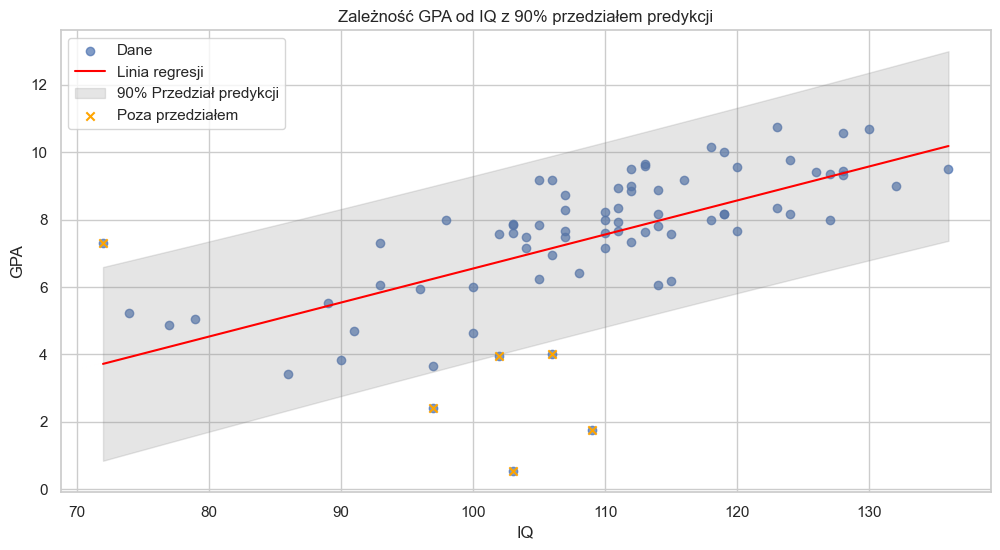

In [79]:
# 2.d
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_sorted = y[sort_idx]

X_sorted = sm.add_constant(x_sorted)
predictions_all = model.get_prediction(X_sorted)
pred_summary = predictions_all.summary_frame(alpha=alpha_pred)

lower_band = pred_summary['obs_ci_lower'].values
upper_band = pred_summary['obs_ci_upper'].values

# find outliers
outliers = 0
for y_i, l, u in zip(y_sorted, lower_band, upper_band):
    if y_i < l or y_i > u:
        outliers += 1

print(f"Liczba obserwacji poza 90% przedziałem predykcyjnym: {outliers} / {n}")
print(f"Procent poza przedziałem: {outliers/n*100:.2f}%")

plt.figure()
plt.scatter(x, y, label='Dane', alpha=0.7)
plt.plot(x_sorted, pred_summary['mean'], color='red', label='Linia regresji')
plt.fill_between(x_sorted, lower_band, upper_band, color='gray', alpha=0.2, label='90% Przedział predykcji')

# Oznaczanie punktów poza przedziałem
outlier_mask = (y_sorted < lower_band) | (y_sorted > upper_band)
if np.any(outlier_mask):
    plt.scatter(x_sorted[outlier_mask], y_sorted[outlier_mask], color='orange', marker='x', label='Poza przedziałem')

plt.xlabel('IQ')
plt.ylabel('GPA')
plt.title('Zależność GPA od IQ z 90% przedziałem predykcji')
plt.legend()
plt.savefig(os.path.join('zad2', 'plot_d_predykcja.png'))

In [80]:
# 2.e
x_ph = df['PH'].values

X_ph = sm.add_constant(x_ph)
model_ph = sm.OLS(y, X_ph).fit()

r2_ph = model_ph.rsquared

print(f"R^2 dla modelu GPA ~ IQ: {r2_lib:.4f}")
print(f"R^2 dla modelu GPA ~ PH: {r2_ph:.4f}")

if r2_lib > r2_ph:
    print("Wniosek: Wynik IQ jest lepszym predyktorem GPA (wyższe R^2).")
else:
    print("Wniosek: Wynik PH jest lepszym predyktorem GPA (wyższe R^2).")

plt.figure()
plt.scatter(x_ph, y, label='Dane (PH)', color='green')
plt.plot(x_ph, model_ph.fittedvalues, color='blue', label='Linia regresji')
plt.xlabel('PH')
plt.ylabel('GPA')
plt.title('Zależność GPA od PH')
plt.legend()
plt.savefig(os.path.join('zad2', 'plot_e_gpa_ph.png'))
plt.close()

R^2 dla modelu GPA ~ IQ: 0.4016
R^2 dla modelu GPA ~ PH: 0.2936
Wniosek: Wynik IQ jest lepszym predyktorem GPA (wyższe R^2).


In [81]:
"""
Coś źle w tym opisie jest xd

1. wygeneruj wektor X (jeden dla wszystkich podpunktów)
2. Dla każdego podpunktu wygeneruj epsilony i Y
dla a i d - osobne epsilony dla każdego Y (czyli 1000 epsilonów)

Dla każdego podpunktu:
Można liczyć p wartość funkcjami z bilbioteki.
Dla każdego modelu Y dostaniemy decyzję czy odrzucamy H_0 czy nie.
No ale my wygenerowaliśmy te dane, więc wiemy patrząc na $\beta_1$,
że dla a-c H_0 jest prawdziwa,
a dla d-f H_1 jest prawdziwa.

Estymator pr odrzucenia H_0 to % przypadków gdzie H_0 odrzuciliśmy
- czyli estymator pr błędu 1-szego rodzaju


"""

'\nCoś źle w tym opisie jest xd\n\n1. wygeneruj wektor X (jeden dla wszystkich podpunktów)\n2. Dla każdego podpunktu wygeneruj epsilony i Y\ndla a i d - osobne epsilony dla każdego Y (czyli 1000 epsilonów)\n\nDla każdego podpunktu:\nMożna liczyć p wartość funkcjami z bilbioteki.\nDla każdego modelu Y dostaniemy decyzję czy odrzucamy H_0 czy nie.\nNo ale my wygenerowaliśmy te dane, więc wiemy patrząc na $\x08eta_1$,\nże dla a-c H_0 jest prawdziwa,\na dla d-f H_1 jest prawdziwa.\n\nEstymator pr odrzucenia H_0 to % przypadków gdzie H_0 odrzuciliśmy\n- czyli estymator pr błędu 1-szego rodzaju\n\n\n'